

## Libraries



In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio

from sklearn import linear_model, model_selection, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/Project Dry Beans Dataset/'
results_path='/content/drive/My Drive/2022_SFC_IDSP/Project Dry Beans Dataset/'

Mounted at /content/drive/


# Dry_beans dataset

DATASET: 

* https://www.muratkoklu.com/datasets/

* https://archive.ics.uci.edu/ml/index.php

https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [4]:
dry_beans=  pd.read_excel(data_path+'Dry_Beans_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
dry_beans.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

## Attribute Information:
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## Atribute selection:
1) A

2) P

3) L

4) I 

*5) K = L/I - Excluded*

*6) Ec - Exluded*

7) C

*8) Ed = ((4A)/pi)^(1/2) - Excluded*

*9) Ex = A/A** - Excluded*

*10) S = A/C - Excluded*

*11) R = A *(4pi/p^2) - Excluded*

*12) CO = Ed/L - Excluded*

*13)14)15) - Excluded*

17) Class



In [ ]:
dry_beans.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
dry_beans =dry_beans .astype({'Class':'category'})
dry_beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
EquivDiameter       float64
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
Class              category
dtype: object

In [5]:
dry_beans.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
pd.unique(dry_beans['Class'])

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

#dry_beans_ind - independent data

In [6]:
dry_beans_ind = dry_beans[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','Class']].copy()
dry_beans_ind.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  Class
0  28395    610.291       208.178117       173.888747  SEKER
1  28734    638.018       200.524796       182.734419  SEKER
2  29380    624.110       212.826130       175.931143  SEKER
3  30008    645.884       210.557999       182.516516  SEKER
4  30140    620.134       201.847882       190.279279  SEKER

In [7]:
dry_beans_ind.to_csv(results_path+'dry_beans_ind.csv',sep=',', index=False)

In [8]:
dry_beans_ind.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength
count   13611.000000  13611.000000     13611.000000     13611.000000
mean    53048.284549    855.283459       320.141867       202.270714
std     29324.095717    214.289696        85.694186        44.970091
min     20420.000000    524.736000       183.601165       122.512653
25%     36328.000000    703.523500       253.303633       175.848170
50%     44652.000000    794.941000       296.883367       192.431733
75%     61332.000000    977.213000       376.495012       217.031741
max    254616.000000   1985.370000       738.860153       460.198497

#Pair plot


<Figure size 8000x6400 with 0 Axes>

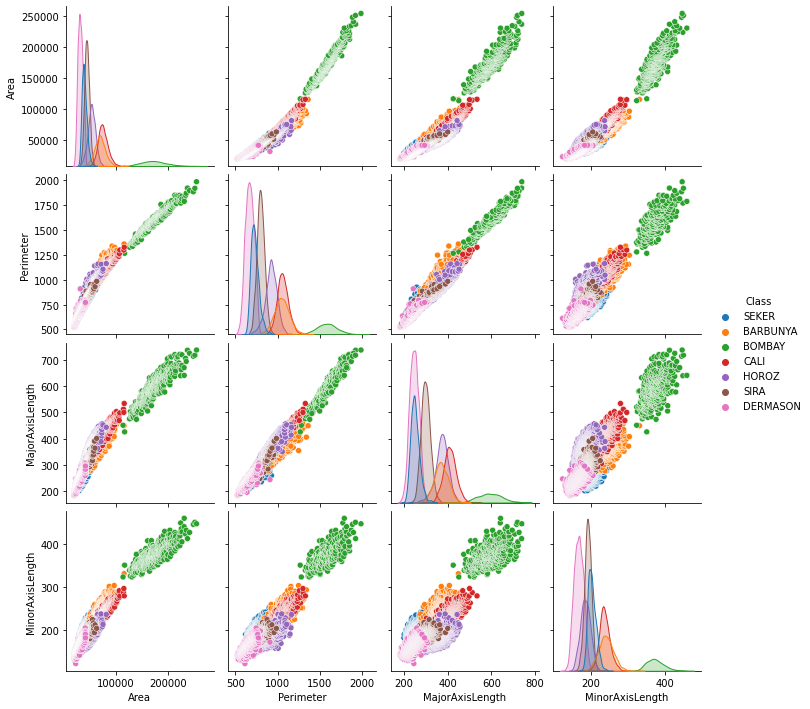

In [9]:
plt.figure(figsize=(20,16), dpi= 400)

sns.pairplot(dry_beans_ind, hue='Class')
plt.savefig(results_path+'dry_beans_pairplot.png')

##Correlation matrix

In [10]:
cor_matrix_b=dry_beans_ind.corr(method='pearson')

cor_matrix_b.round(2)

Area  Perimeter  MajorAxisLength  MinorAxisLength
Area             1.00       0.97             0.93             0.95
Perimeter        0.97       1.00             0.98             0.91
MajorAxisLength  0.93       0.98             1.00             0.83
MinorAxisLength  0.95       0.91             0.83             1.00

## MajorAxisLength - Perimeter

In [11]:
train, test =  model_selection.train_test_split(dry_beans_ind, test_size=0.33,random_state=300, shuffle=True)

X_train=train['MajorAxisLength'].values.reshape(-1, 1)
print('X_train shape:', X_train.shape)

y_train= train['Perimeter'].values
print('y_train shape:', y_train.shape)

lin_reg_mdl=linear_model.LinearRegression()
lin_reg_mdl.fit(X_train,y_train)

X_test=test['MajorAxisLength'].values.reshape(-1,1)
print('X_test shape:', X_test.shape)

yfit = lin_reg_mdl.predict(X_test)
print('yfit predict shape:', yfit.shape)


X_train shape: (9119, 1)
y_train shape: (9119,)
X_test shape: (4492, 1)
yfit predict shape: (4492,)


In [12]:
mdl_slope=np.round(lin_reg_mdl.coef_[0],2)
mdl_inter=np.round(lin_reg_mdl.intercept_,2)
beans_MSE = np.round(skl.metrics.mean_squared_error(test['Perimeter'].values, yfit),2)
beans_r2 = np.round(skl.metrics.r2_score(test['Perimeter'].values, yfit), 2)

print('model slope:{}, model intercept: {}, mean sq. error: {}, R^2: {}'.format(mdl_slope,mdl_inter,beans_MSE,beans_r2))

model slope:2.45, model intercept: 70.76, mean sq. error: 1972.66, R^2: 0.95


In [13]:
plt.figure(figsize=(20,9), dpi=350)


sns.scatterplot(data= train, x= 'MajorAxisLength',y= 'Perimeter', hue='Class')
sns.scatterplot(data= test, x= 'MajorAxisLength',y= 'Perimeter',color='red', alpha=0.95,marker="*")

plt.title('model slope:{}, model intercept: {}, mean sq. error: {}, R^2: {}'.format(mdl_slope,mdl_inter,beans_MSE,beans_r2))
plt.plot(X_test,yfit, color='red', )

Output hidden; open in https://colab.research.google.com to view.

# Data Transformations on MajorAxisLength
1.   $\sqrt{mpg}$
2.   $\frac{1}{\sqrt{mpg}}$
3.   $\frac{1}{{mpg}}$ 


In [ ]:
dry_beans_ind.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'Class'],
      dtype='object')

In [16]:
dry_beans_ind['inv_MajorAxisLength']= 1/(dry_beans_ind['MajorAxisLength'])

dry_beans_ind['sqrt_MajorAxisLength']= np.sqrt(dry_beans_ind['MajorAxisLength'])

dry_beans_ind['inv_sqrt_MajorAxisLength']= 1/np.sqrt(dry_beans_ind['MajorAxisLength'])

#build a new dataframe to just look at these parameters
dry_beans_transformed=dry_beans_ind[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                                  'inv_MajorAxisLength','sqrt_MajorAxisLength','inv_sqrt_MajorAxisLength',
                                  'Class']]


<Figure size 8000x6400 with 0 Axes>

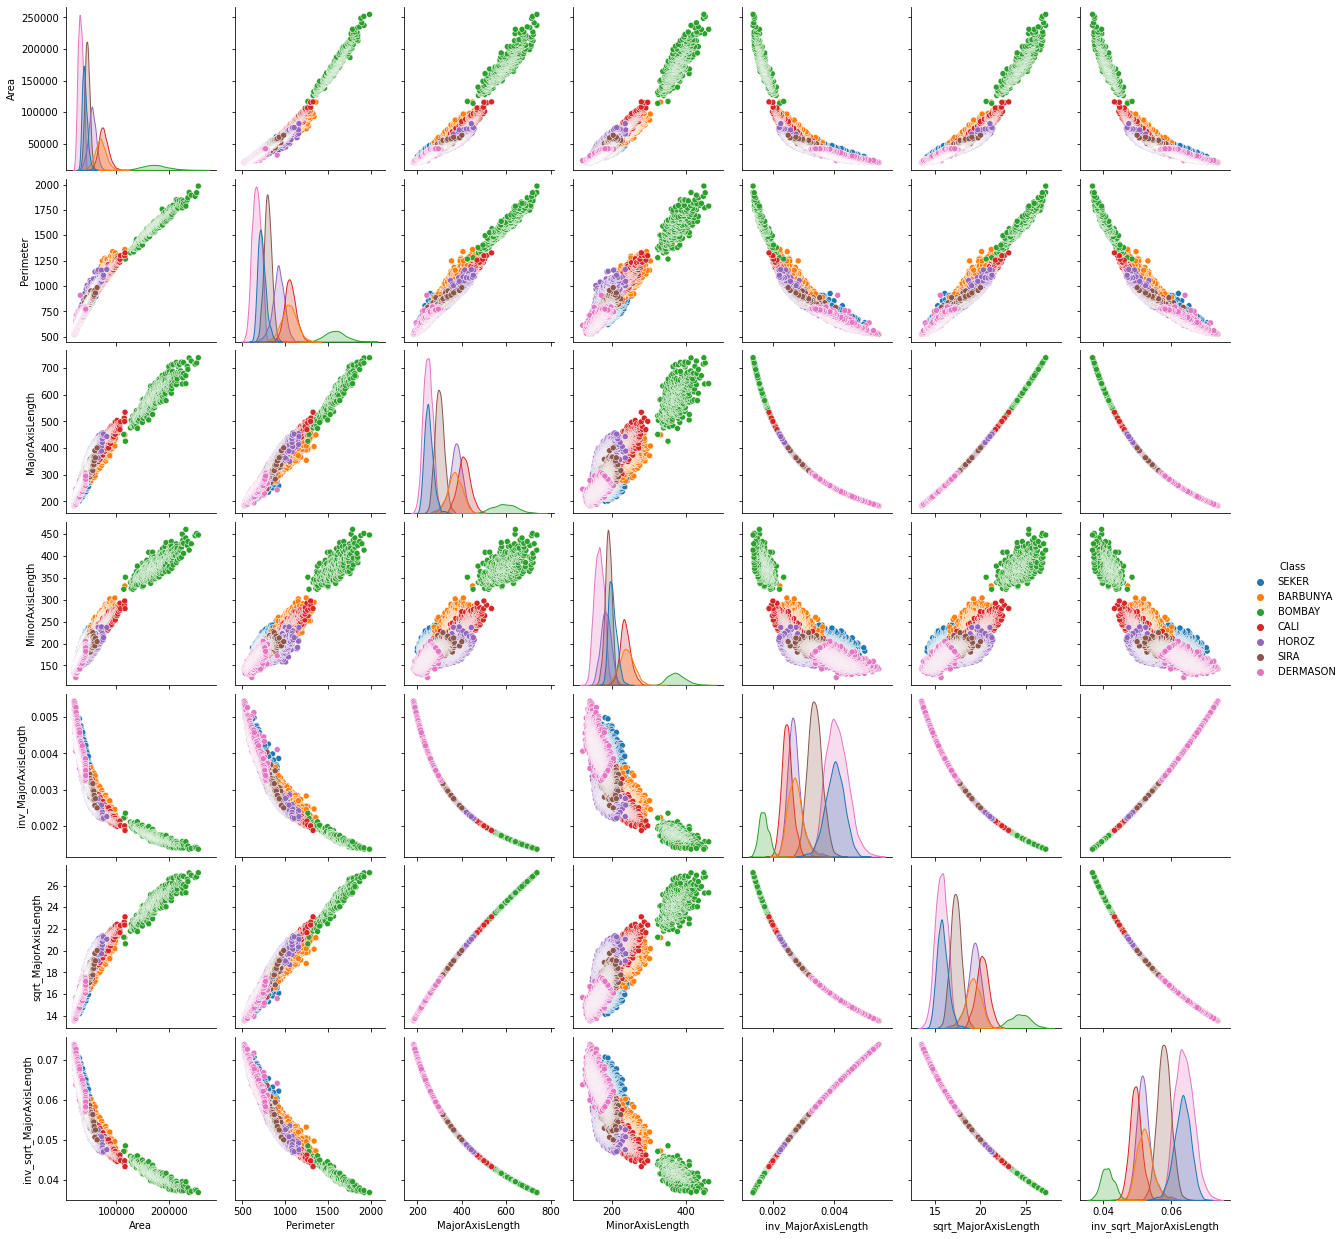

In [17]:
plt.figure(figsize=(20,16), dpi= 400)

sns.pairplot(dry_beans_transformed, hue='Class',)

## inv_MajorAxisLength - Perimeter

In [18]:
fig = plt.figure(figsize=(20,9), dpi=350)

fig.add_subplot(1,2,1)
sns.scatterplot(data= dry_beans_ind, x= 'MajorAxisLength',y= 'Perimeter', hue='Class')
fig.add_subplot(1,2,2)
sns.scatterplot(data= dry_beans_transformed, x= 'inv_MajorAxisLength',y= 'Perimeter', hue='Class')

Output hidden; open in https://colab.research.google.com to view.

## sqrt_MajorAxisLength - Perimeter

In [19]:
fig = plt.figure(figsize=(20,9), dpi=350)

fig.add_subplot(1,2,1)
sns.scatterplot(data= dry_beans_ind, x= 'MajorAxisLength',y= 'Perimeter', hue='Class')
fig.add_subplot(1,2,2)
sns.scatterplot(data= dry_beans_transformed, x= 'sqrt_MajorAxisLength',y= 'Perimeter', hue='Class')


Output hidden; open in https://colab.research.google.com to view.

## inv_sqrt_MajorAxisLength - Perimeter

In [20]:
fig = plt.figure(figsize=(20,9), dpi=350)

fig.add_subplot(1,2,1)
sns.scatterplot(data= dry_beans_ind, x= 'MajorAxisLength',y= 'Perimeter', hue='Class')
fig.add_subplot(1,2,2)
sns.scatterplot(data= dry_beans_transformed, x= 'inv_sqrt_MajorAxisLength',y= 'Perimeter', hue='Class')


Output hidden; open in https://colab.research.google.com to view.

#Transformations

1.   $\sqrt{mpg}$
2.   $\frac{1}{\sqrt{mpg}}$
3.   $\frac{1}{{mpg}}$ 


In [21]:
dry_beans_ind.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class',
       'inv_MajorAxisLength', 'sqrt_MajorAxisLength',
       'inv_sqrt_MajorAxisLength'],
      dtype='object')

In [22]:
db = dry_beans_ind[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']].copy()
db.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  Class
0  28395    610.291       208.178117       173.888747  SEKER
1  28734    638.018       200.524796       182.734419  SEKER
2  29380    624.110       212.826130       175.931143  SEKER
3  30008    645.884       210.557999       182.516516  SEKER
4  30140    620.134       201.847882       190.279279  SEKER

## inv

In [24]:
db_inv = dry_beans_ind[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']].copy()

db_inv['inv_Area']= 1/np.sqrt(db_inv['Area'])
db_inv['inv_Perimeter']= 1/np.sqrt(db_inv['Perimeter'])
db_inv['inv_MajorAxisLength']= 1/np.sqrt(db_inv['MajorAxisLength'])
db_inv['inv_MinorAxisLength']= 1/np.sqrt(db_inv['MinorAxisLength'])


db_inv.to_csv(results_path+'db_inv.csv',sep=',', index=False)

<Figure size 8000x6400 with 0 Axes>

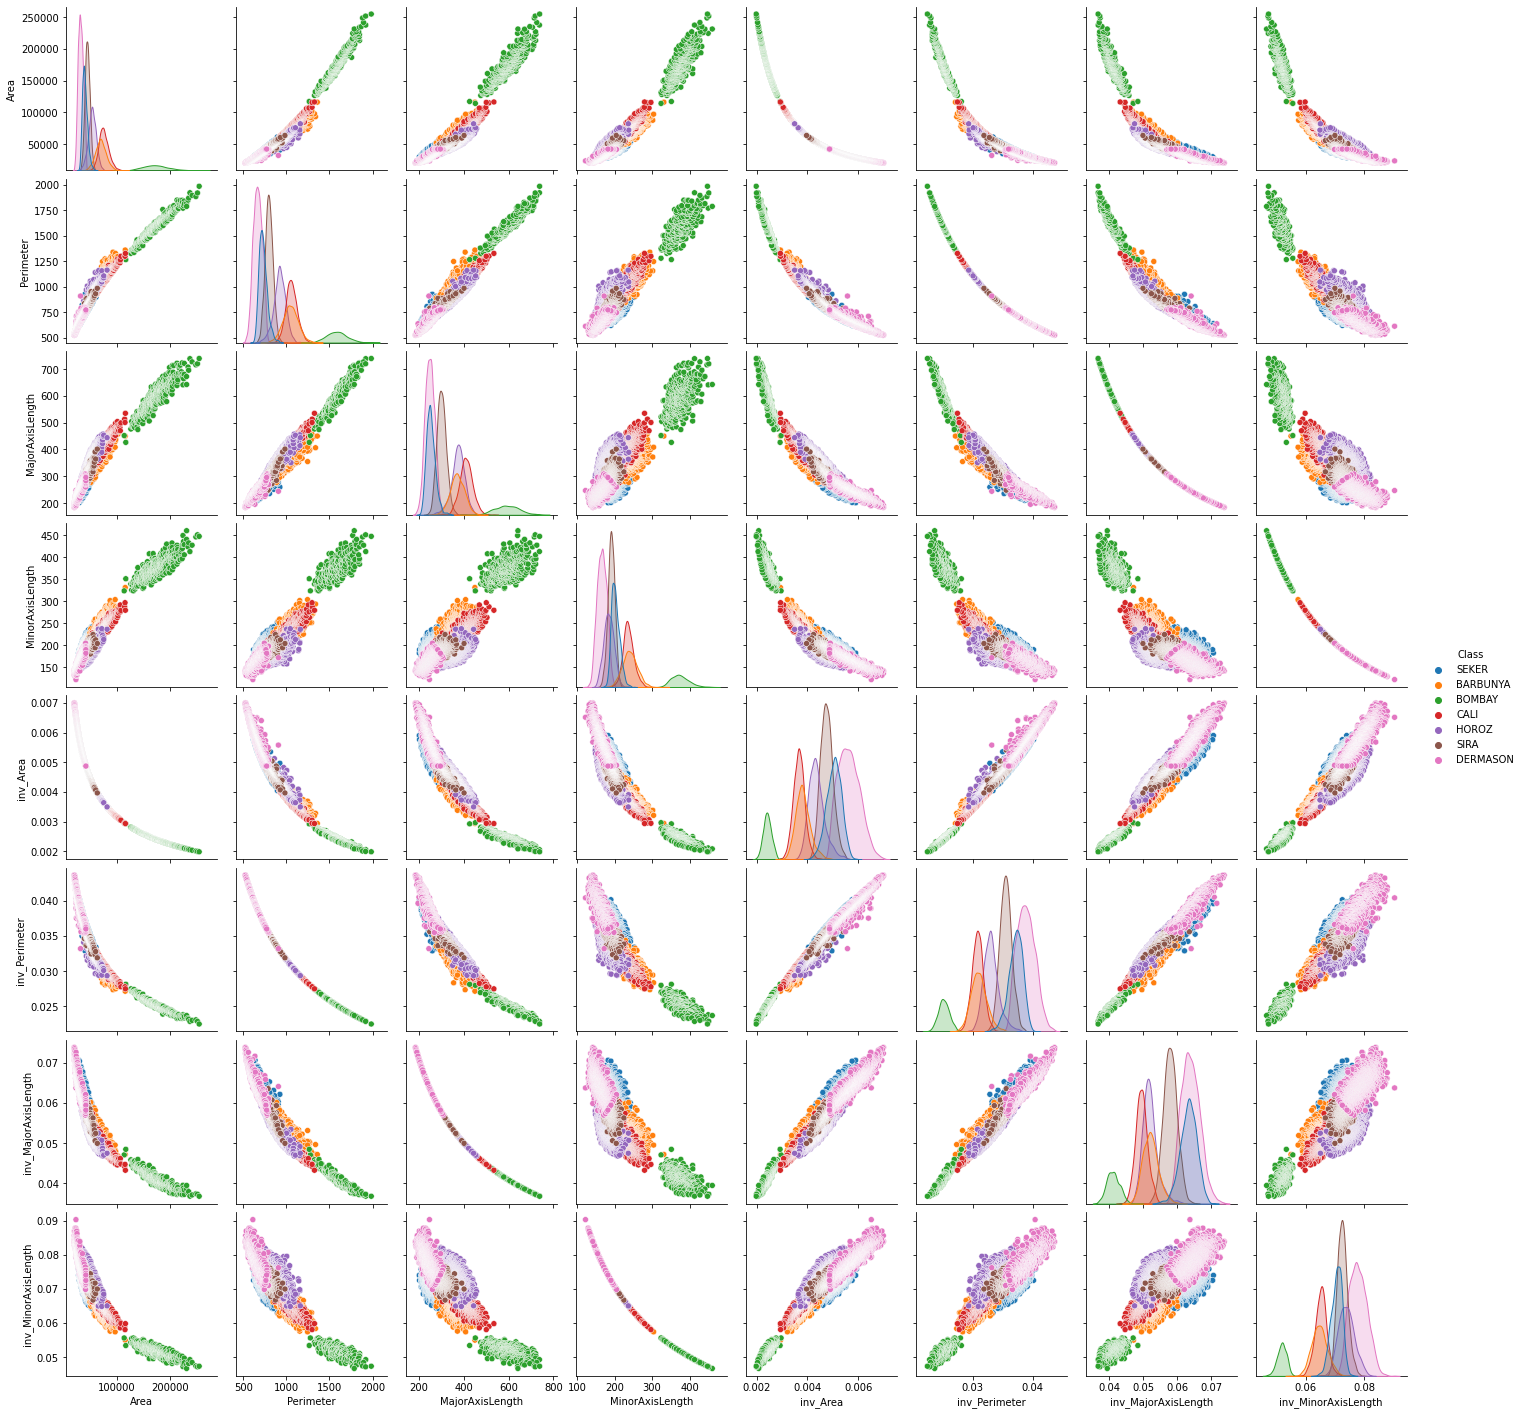

In [28]:
plt.figure(figsize=(20,16), dpi= 400)

sns.pairplot(db_inv, hue='Class',)
plt.savefig(results_path +'db_inv.png')

## sqrt

In [29]:
db_sqrt = dry_beans_ind[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']].copy()

db_sqrt['sqrt_Area']= np.sqrt(db_sqrt['Area'])
db_sqrt['sqrt_Perimeter']= np.sqrt(db_sqrt['Perimeter'])
db_sqrt['sqrt_MajorAxisLength']= np.sqrt(db_sqrt['MajorAxisLength'])
db_sqrt['sqrt_MinorAxisLength']= np.sqrt(db_sqrt['MinorAxisLength'])


db_sqrt.to_csv(results_path+'db_sqrt.csv',sep=',', index=False)

<Figure size 8000x6400 with 0 Axes>

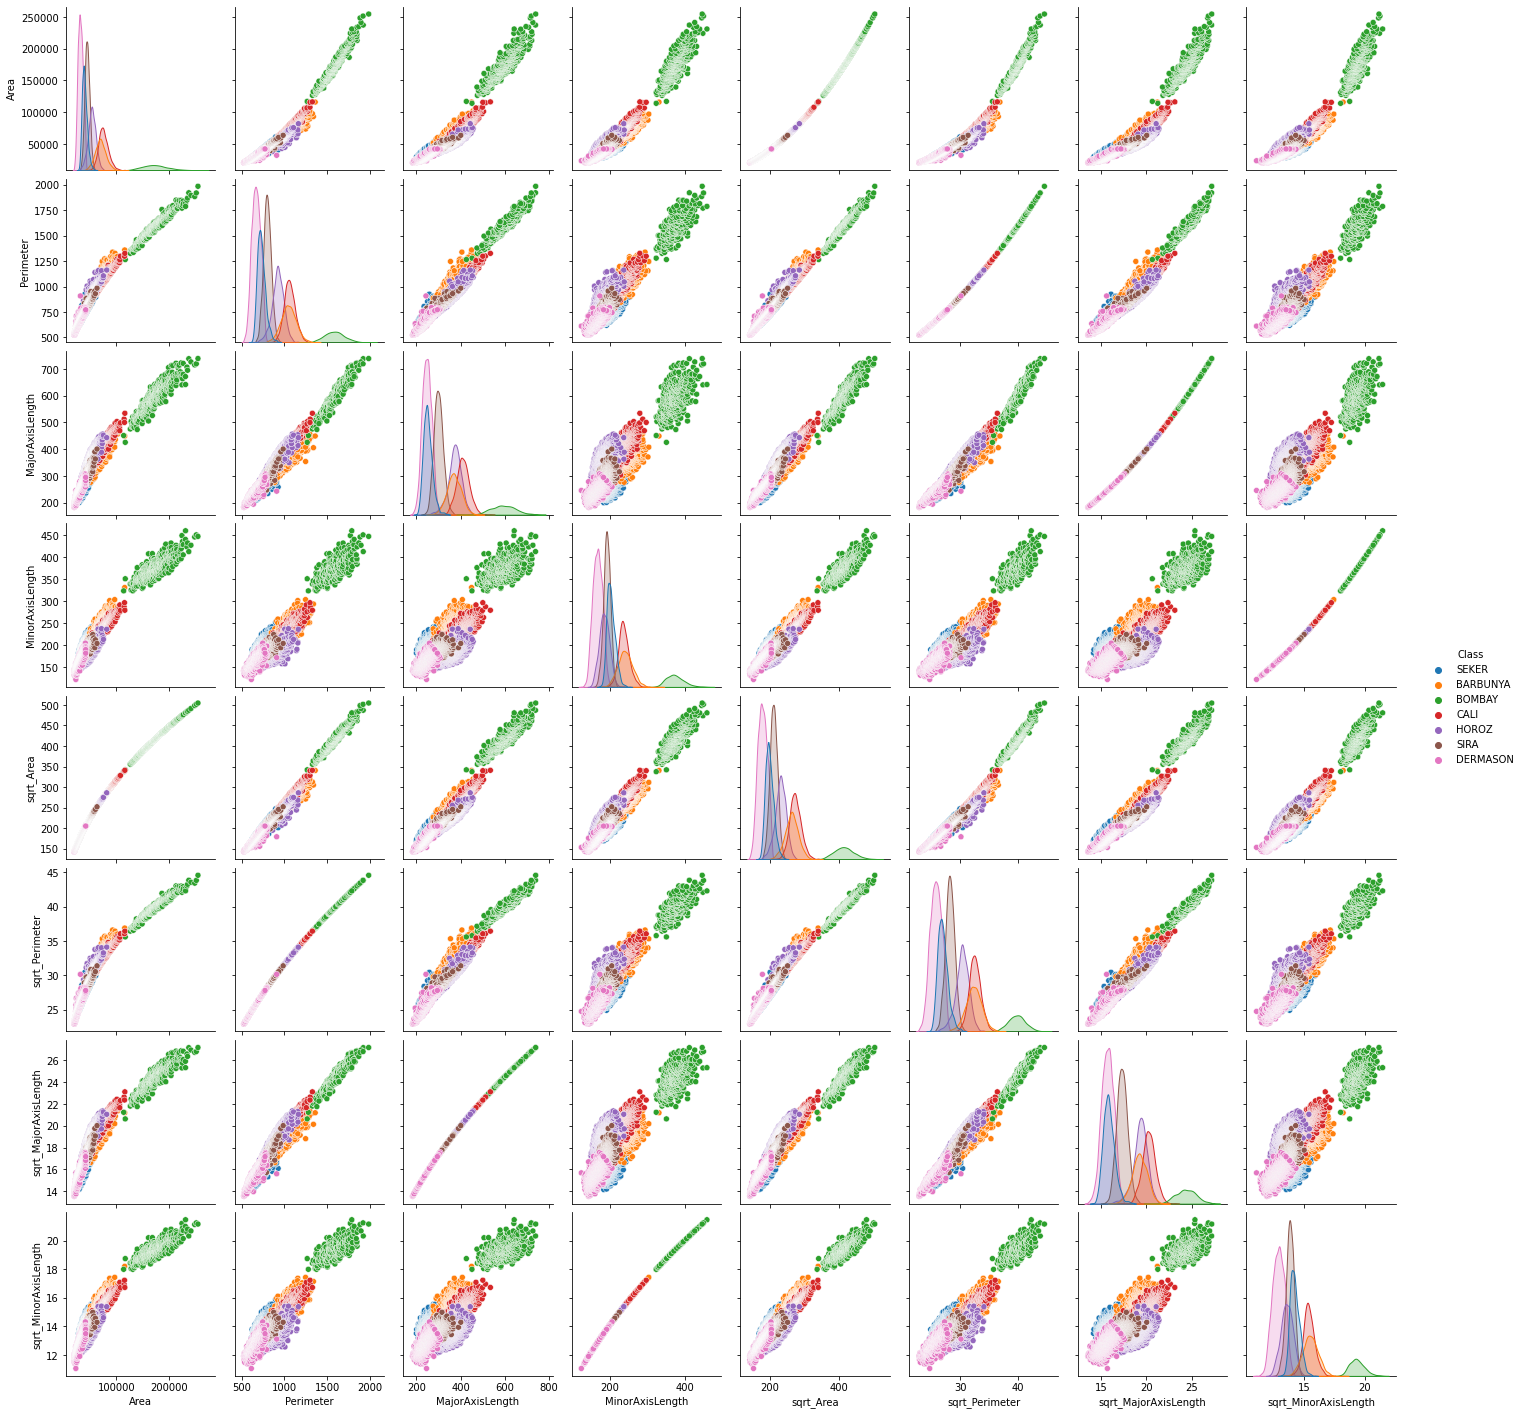

In [30]:
plt.figure(figsize=(20,16), dpi= 400)

sns.pairplot(db_sqrt,hue='Class',)
plt.savefig(results_path +'db_sqrt.png')

## inv_sqrt

In [31]:
db_inv_sqr = dry_beans_ind[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']].copy()

db_inv_sqr['inv_sqrt_Area']= 1/np.sqrt(db_inv_sqr['Area'])
db_inv_sqr['inv_sqrt_Perimeter']= 1/np.sqrt(db_inv_sqr['Perimeter'])
db_inv_sqr['inv_sqrt_MajorAxisLength']= 1/np.sqrt(db_inv_sqr['MajorAxisLength'])
db_inv_sqr['inv_sqrt_MinorAxisLength']= 1/np.sqrt(db_inv_sqr['MinorAxisLength'])


db_inv_sqr.to_csv(results_path+'db_inv_sqr.csv',sep=',', index=False)

<Figure size 8000x6400 with 0 Axes>

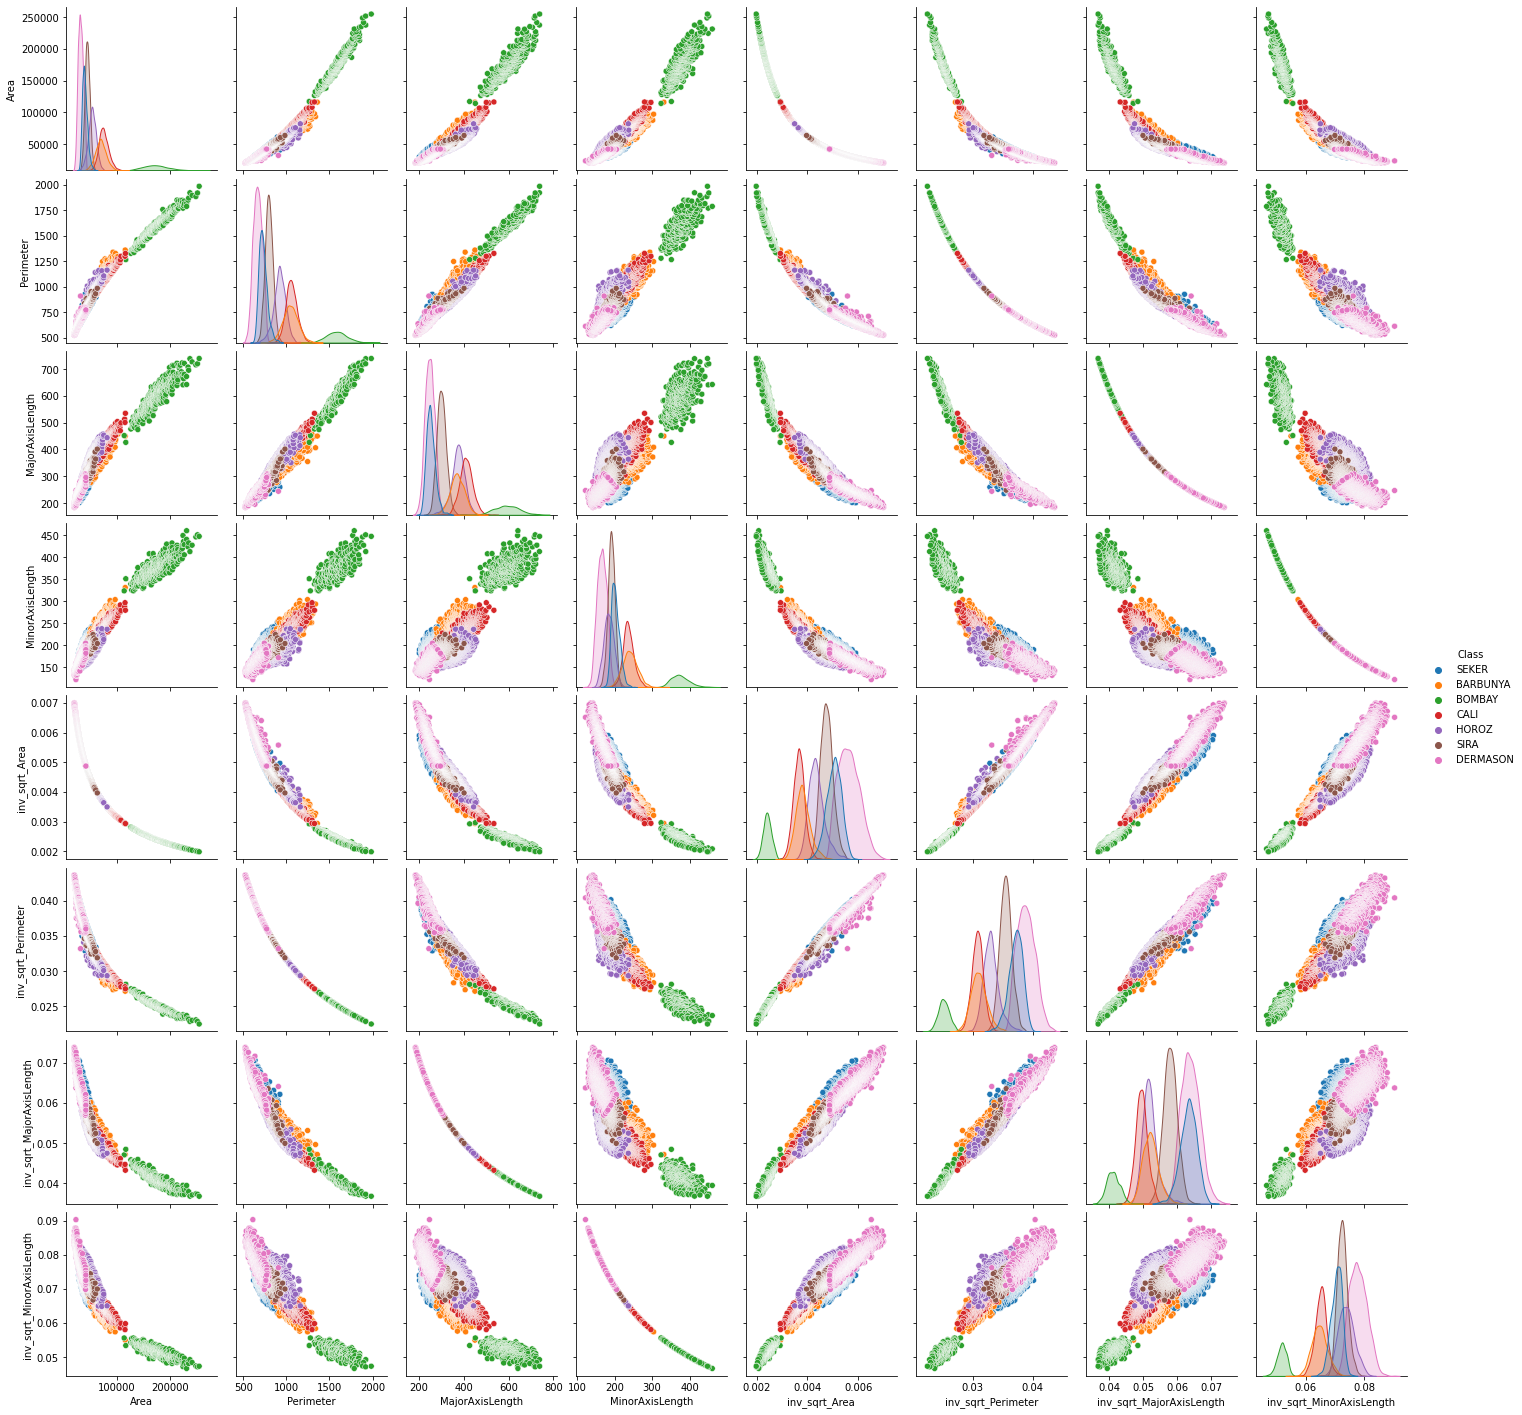

In [32]:
plt.figure(figsize=(20,16), dpi= 400)

sns.pairplot(db_inv_sqr, hue='Class',)
plt.savefig(results_path +'db_inv_sqrt.png')

#Normalisation


In [ ]:
dry_beans_ind.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'Class', 'sqrt_MajorAxisLength', 'inv_sqrt_MajorAxisLength',
       'inv_MajorAxisLength'],
      dtype='object')

In [ ]:
dry_beans_n = dry_beans[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','ConvexArea','Class']].copy()
dry_beans_n.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  ConvexArea  Class
0  28395    610.291       208.178117       173.888747       28715  SEKER
1  28734    638.018       200.524796       182.734419       29172  SEKER
2  29380    624.110       212.826130       175.931143       29690  SEKER
3  30008    645.884       210.557999       182.516516       30724  SEKER
4  30140    620.134       201.847882       190.279279       30417  SEKER

In [ ]:
dry_beans_n.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'Class'],
      dtype='object')

In [ ]:
dry_beans_n.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
ConvexArea            int64
Class              category
dtype: object

<Figure size 8000x6400 with 0 Axes>

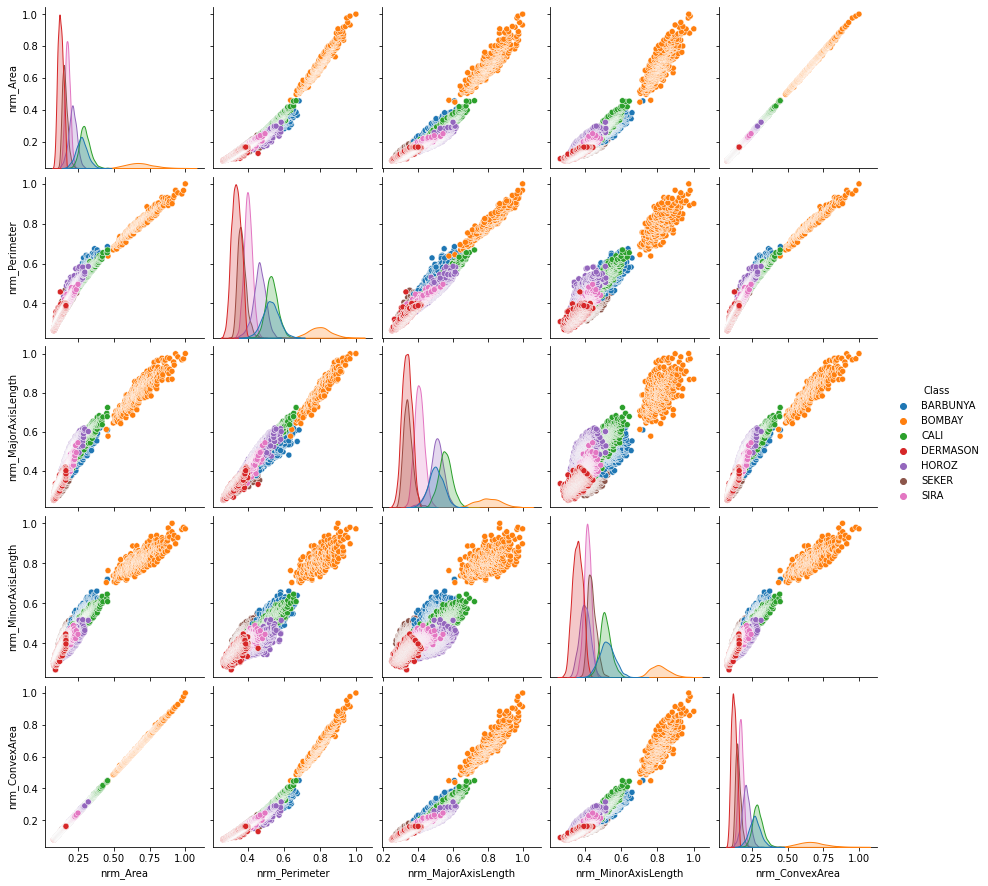

In [ ]:
dry_beans_nrm= dry_beans_n[['Class']].copy()
new_cols=['nrm_Area','nrm_Perimeter','nrm_MajorAxisLength','nrm_MinorAxisLength']
dbn_var=dry_beans_n.columns[0:]

dry_beans_nrm.reindex(columns=new_cols)

for i, col in enumerate(new_cols,0):  
  dry_beans_nrm[col]= dry_beans_n[dbn_var[i]]/dry_beans_n[dbn_var[i]].max()

plt.figure(figsize=(20,16), dpi= 400)
sns.pairplot(dry_beans_nrm, hue='Class',)

In [ ]:
dry_beans_nrm.head()

Class  nrm_Area  nrm_Perimeter  nrm_MajorAxisLength  nrm_MinorAxisLength  \
0  SEKER  0.111521       0.307394             0.281756             0.377856   
1  SEKER  0.112852       0.321360             0.271397             0.397077   
2  SEKER  0.115389       0.314355             0.288047             0.382294   
3  SEKER  0.117856       0.325322             0.284977             0.396604   
4  SEKER  0.118374       0.312352             0.273188             0.413472   

   nrm_ConvexArea  
0        0.109074  
1        0.110810  
2        0.112778  
3        0.116705  
4        0.115539

In [ ]:
dry_beans_nrm.dtypes

# Standard Scaler

In [ ]:
dry_beans_s = dry_beans[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','Class']].copy()
dry_beans_s.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  Class
0  28395    610.291       208.178117       173.888747  SEKER
1  28734    638.018       200.524796       182.734419  SEKER
2  29380    624.110       212.826130       175.931143  SEKER
3  30008    645.884       210.557999       182.516516  SEKER
4  30140    620.134       201.847882       190.279279  SEKER

<Figure size 1008x576 with 0 Axes>

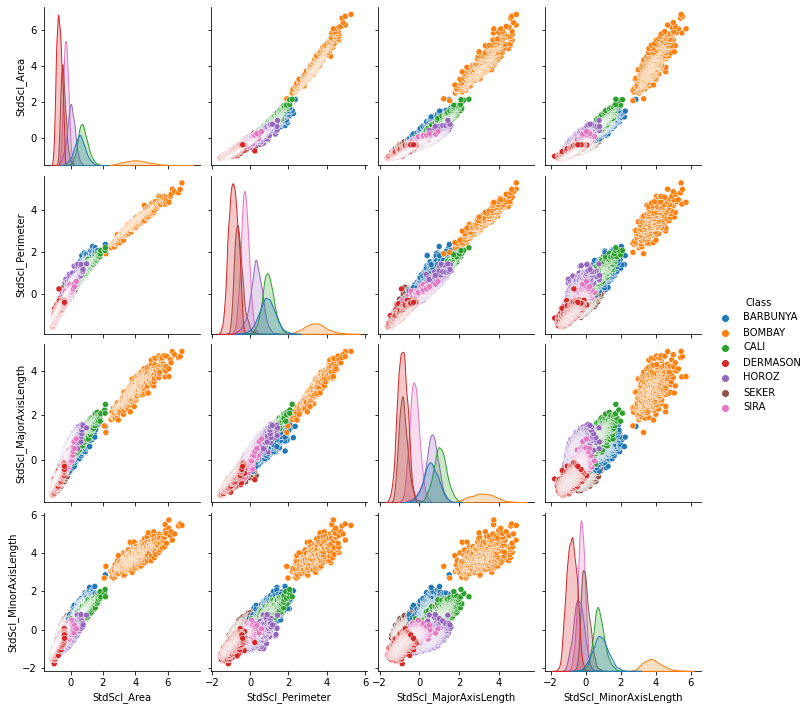

In [ ]:
scaler = skl.preprocessing.StandardScaler()
db_phys_scale= scaler.fit_transform(dry_beans_s.iloc[: , :-1].copy())
scl_columns=['StdScl_Area','StdScl_Perimeter','StdScl_MajorAxisLength','StdScl_MinorAxisLength']
db_phys_scale=pd.DataFrame(db_phys_scale, columns = scl_columns)

db_phys_scale['Class']=dry_beans_s['Class']

plt.figure(figsize=(14,8))
sns.pairplot(db_phys_scale,hue='Class')

plt.savefig(results_path +'db_physical_std_scaler.png')
db_phys_scale.to_csv(results_path+'db_phys_scale.csv',sep=',', index=False)